In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2011.csv', dtype = {'fips': str})
climate_2011 = ur_files.compute()
climate_2011 = climate_2011.loc[:, ~climate_2011.columns.str.contains('^Unnamed')]
climate_2011.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,65.621429,9.297253,4.252198,0.126039,0.159341,0.450549,0.010989,0.0,0.151099,67.286664,65.046045,11.1,1.0,3,4.740725
1,01003,12.427907,68.232022,NaN,6.284270,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.0,9.0,5,14.995956
2,01005,94.311111,66.181319,9.162953,3.095055,0.075809,0.101648,0.609890,0.057692,0.0,0.208791,62.049123,65.415759,10.8,1.0,5,5.908109
3,01007,162.637500,63.414521,9.024384,3.372055,0.128986,0.052055,0.301370,0.013699,0.0,0.134247,67.718741,62.638753,11.0,6.0,2,8.637002
4,01009,243.931250,60.076986,NaN,4.146575,0.157205,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.6,7.0,2,12.206285


In [4]:
climate_2011 = climate_2011[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2011 = climate_2011.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2011.iloc[:, 1:-1].values
y = climate_2011.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.23871221, 0.06563121, 0.05563333, 0.07073436, 0.05772378,
       0.03070465, 0.05434605, 0.06994554, 0.00605558, 0.04428233,
       0.03452716, 0.12515531, 0.06142242, 0.04702745, 0.03809863])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2011.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

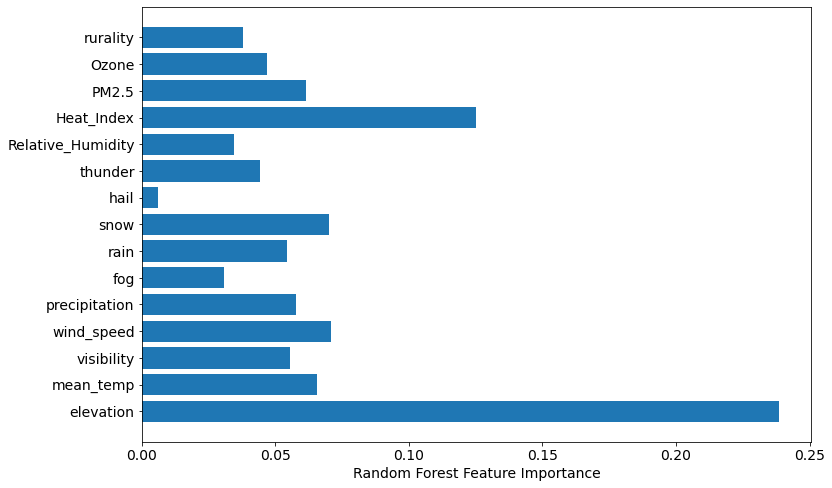

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8,  5, 10, 14,  9, 13,  6,  2,  4, 12,  1,  7,  3, 11,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00605558, 0.03070465, 0.03452716, 0.03809863, 0.04428233,
       0.04702745, 0.05434605, 0.05563333, 0.05772378, 0.06142242,
       0.06563121, 0.06994554, 0.07073436, 0.12515531, 0.23871221])

Text(0.5, 0, 'Random Forest Feature Importance')

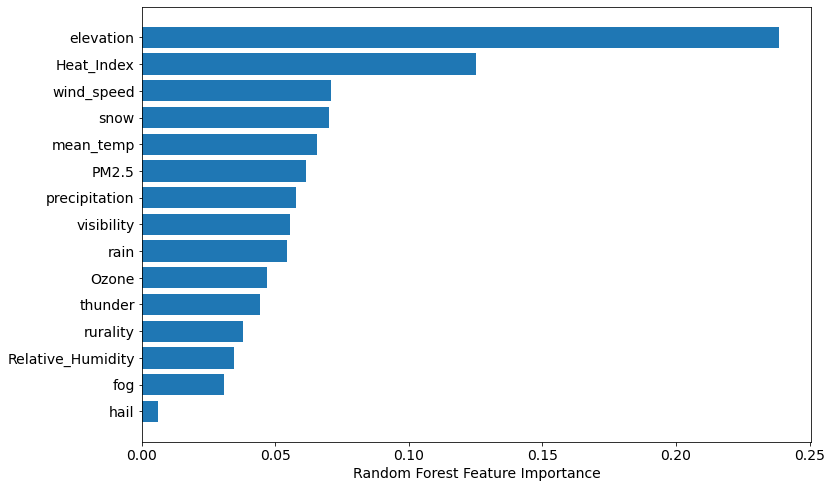

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

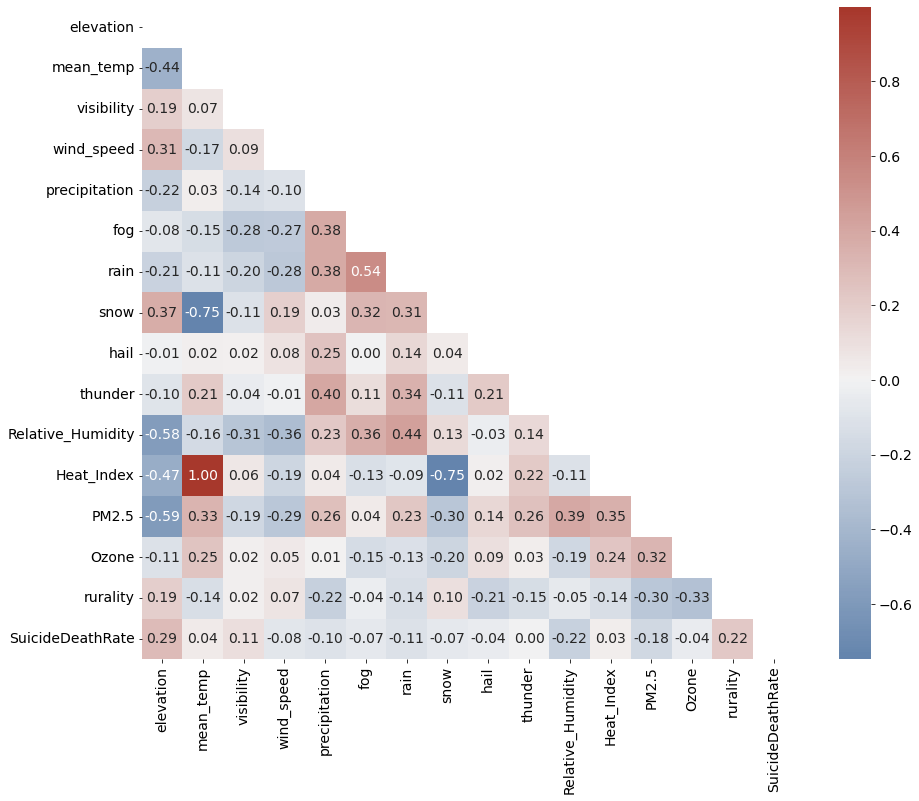

In [21]:
correlation_matrix(climate_2011)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2011.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2011 = ur_files.compute()
social_2011 = social_2011.loc[:, ~social_2011.columns.str.contains('^Unnamed')]
social_2011.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,56037,31125.0,0.092924,0.096559,0.242061,0.033073,0.181376,0.030211,0.064059,0.082661,0.089963,0.269814,0.185646,NaN,0.015550,0.162539,"Sweetwater County, WY",27.164686
1,56031,25280.0,0.118223,0.082689,0.142990,0.044694,0.177694,0.012887,0.017149,0.203433,0.036298,0.210575,0.072342,NaN,0.011519,0.287199,"Platte County, WY",11.868796
2,56033,27805.0,0.081668,0.062251,0.093855,0.046951,0.150884,0.023557,0.032139,0.154333,0.044119,0.221063,0.071391,NaN,0.029538,0.263380,"Sheridan County, WY",14.198940
3,56003,25452.0,0.091598,0.106353,0.139167,0.020382,0.190996,0.019297,0.009142,0.177703,0.057029,0.258201,0.104908,NaN,0.014801,0.128490,"Big Horn County, WY",16.160618
4,56011,25653.0,0.077823,0.081313,0.257348,0.005874,0.190272,0.022806,0.004210,0.159688,0.023684,0.234768,0.023968,NaN,0.012561,0.159402,"Crook County, WY",14.267398


In [23]:
social_2011['SuicideDeathRate'].isna().sum()

206

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2011 = social_2011.dropna(how = 'any')

In [25]:
social_2011.shape

(807, 18)

In [26]:
X = social_2011.iloc[:, 1:-2].values
y = social_2011.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0564726 , 0.02996041, 0.04013158, 0.32160669, 0.04854526,
       0.04263437, 0.03695536, 0.04494863, 0.09426163, 0.07938988,
       0.04426821, 0.03061205, 0.06502436, 0.0285344 , 0.03665457])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2011.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2011.shape

(807, 18)

In [32]:
climate_2011.shape

(2638, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

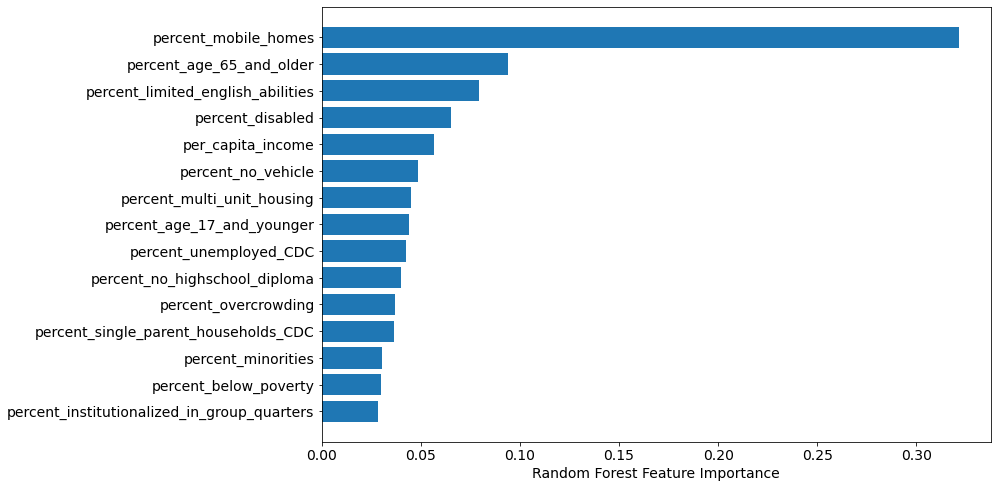

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

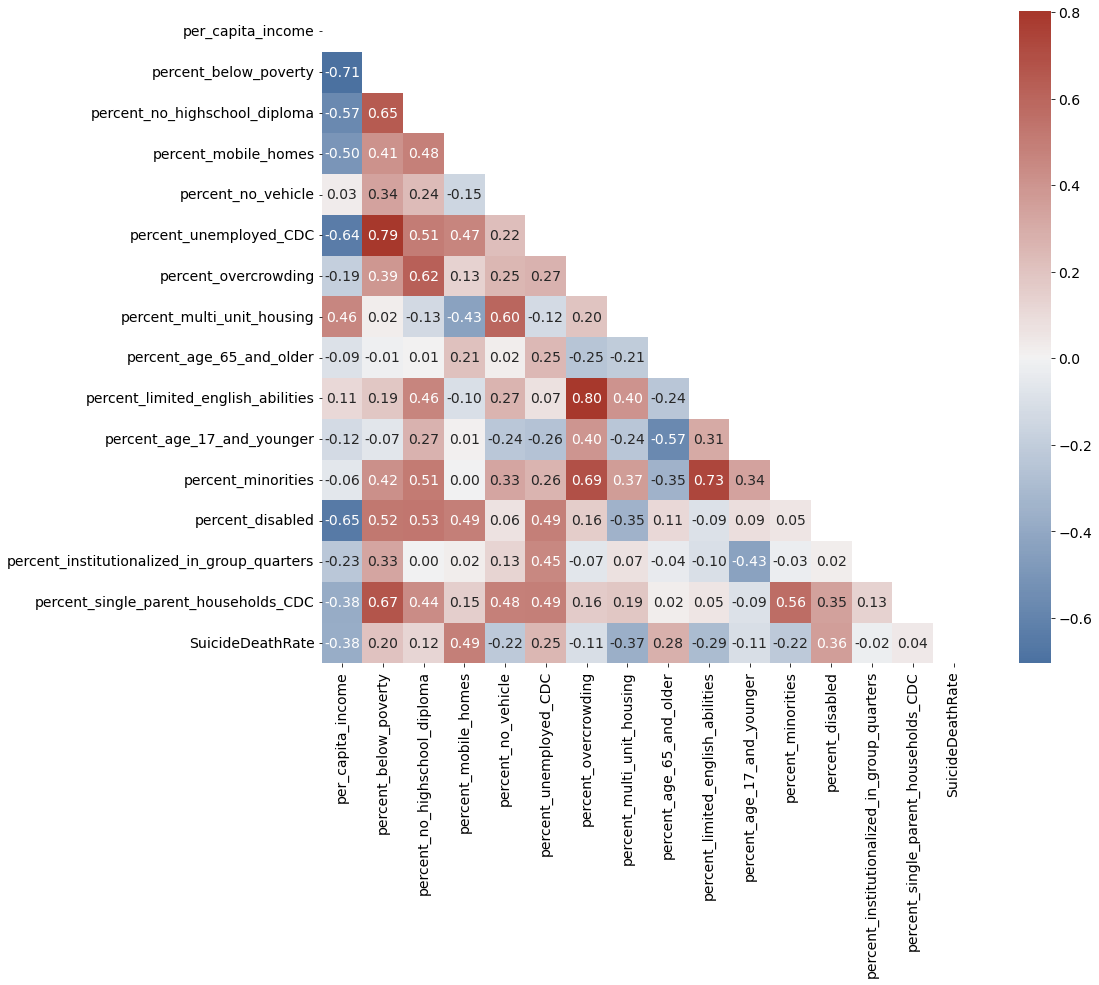

In [36]:
correlation_matrix(social_2011)

## find the rank of importances of all factors

In [37]:
df_total = social_2011.merge(climate_2011, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
0,36119,48306.0,0.088929,0.131234,0.000916,0.144683,0.189093,0.042072,0.267763,0.145379,...,0.172603,0.383562,0.079452,0.00000,0.073973,66.603371,51.191235,9.4,5.0,2.0
3,36109,26199.0,0.203616,0.077040,0.082709,0.136046,0.303702,0.013444,0.118258,0.107064,...,0.164384,0.449315,0.241096,0.00000,0.071233,73.082783,46.018069,8.7,0.0,4.0
4,36113,28939.0,0.106980,0.098109,0.070767,0.067906,0.195584,0.009439,0.048014,0.167744,...,0.268493,0.378082,0.147945,0.00000,0.060274,72.531142,45.529238,8.7,0.0,4.0
6,36055,27712.0,0.144338,0.119694,0.006284,0.113960,0.215928,0.011992,0.093280,0.138034,...,0.095890,0.468493,0.252055,0.00274,0.093151,69.219446,47.671834,9.0,3.0,1.0
7,36065,24459.0,0.151475,0.143589,0.060457,0.109580,0.226020,0.013924,0.065988,0.161855,...,0.200000,0.449315,0.238356,0.00000,0.038356,72.991650,46.059594,8.8,0.0,3.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(736, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,36119,"Westchester County, NY",0.088929,48306.0,0.189093,0.131234,0.145379,0.241451,0.363424,0.219030,...,51.191235,0.172603,0.383562,0.079452,0.00000,0.073973,9.4,5.0,2.0,1.987658
3,36109,"Tompkins County, NY",0.203616,26199.0,0.303702,0.077040,0.107064,0.163372,0.383646,0.197805,...,46.018069,0.164384,0.449315,0.241096,0.00000,0.071233,8.7,0.0,4.0,6.202585
4,36113,"Warren County, NY",0.106980,28939.0,0.195584,0.098109,0.167744,0.207764,0.443926,0.177804,...,45.529238,0.268493,0.378082,0.147945,0.00000,0.060274,8.7,0.0,4.0,7.651461
6,36055,"Monroe County, NY",0.144338,27712.0,0.215928,0.119694,0.138034,0.229035,0.417822,0.317078,...,47.671834,0.095890,0.468493,0.252055,0.00274,0.093151,9.0,3.0,1.0,4.559933
7,36065,"Oneida County, NY",0.151475,24459.0,0.226020,0.143589,0.161855,0.219958,0.550351,0.272954,...,46.059594,0.200000,0.449315,0.238356,0.00000,0.038356,8.8,0.0,3.0,8.181431


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.01304381, 0.02272333, 0.01308649, 0.01416038, 0.05424325,
       0.01659453, 0.02829118, 0.01264473, 0.02340486, 0.04760452,
       0.05432903, 0.29811315, 0.01933094, 0.02355045, 0.01716541,
       0.08553904, 0.01932683, 0.03685294, 0.01911378, 0.0153243 ,
       0.02735414, 0.01799523, 0.01443251, 0.01637892, 0.0151988 ,
       0.00576667, 0.01134304, 0.03188116, 0.01832321, 0.0068834 ])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

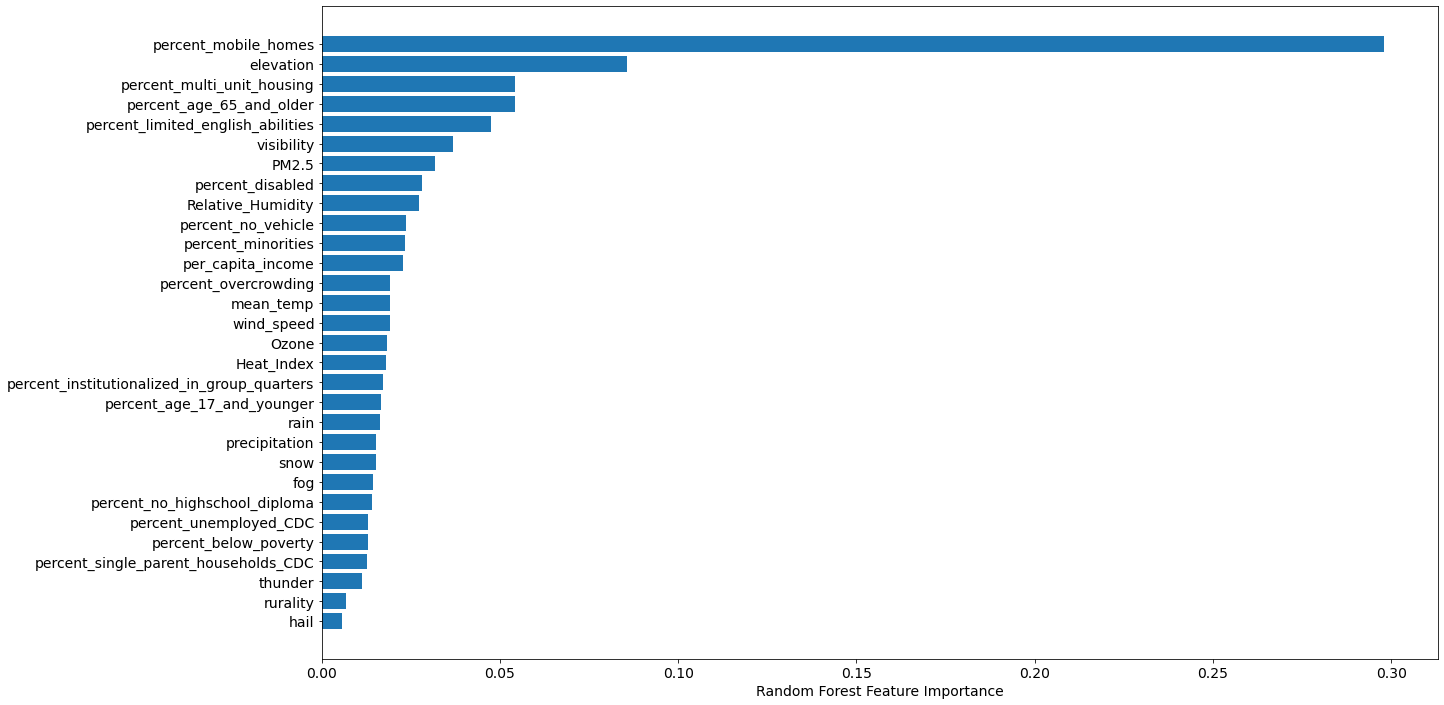

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2011.iloc[:, 1:-1]
y = climate_2011.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


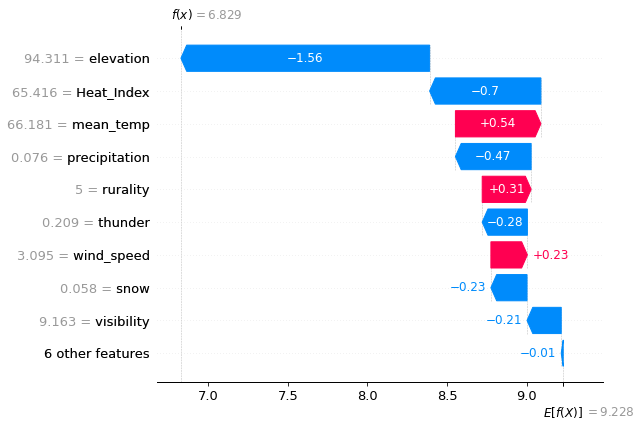

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

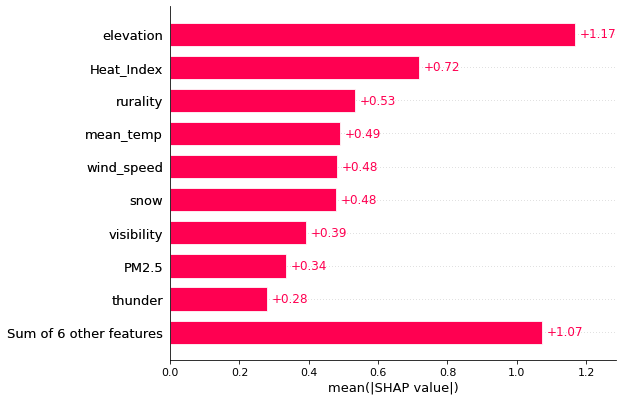

In [56]:
shap.plots.bar(shap_values)

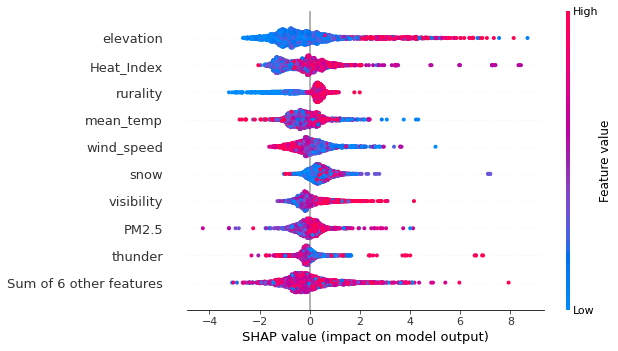

In [57]:
shap.plots.beeswarm(shap_values)

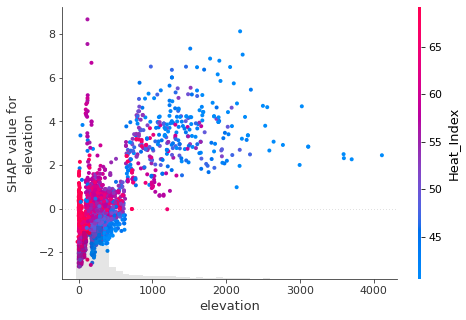

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

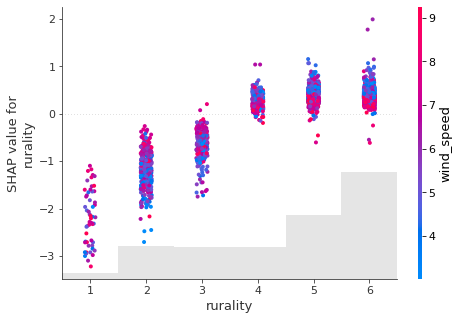

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

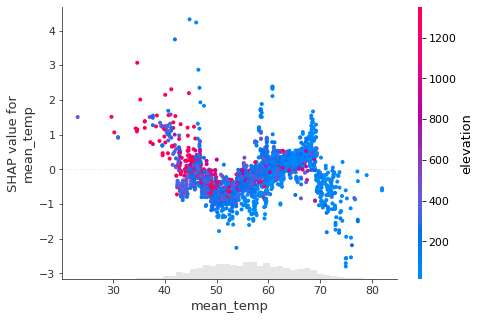

In [60]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

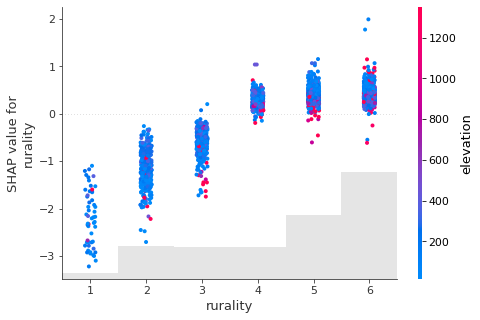

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

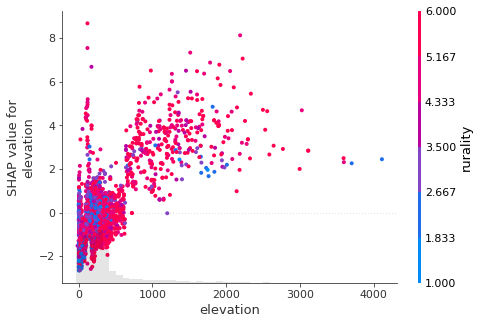

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

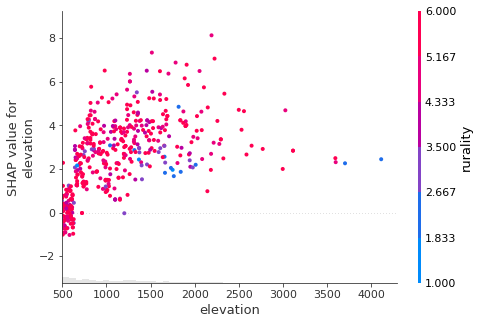

In [63]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

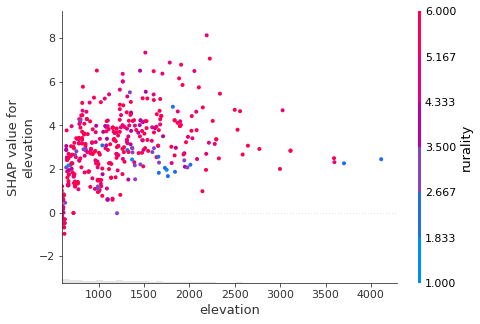

In [64]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=600)

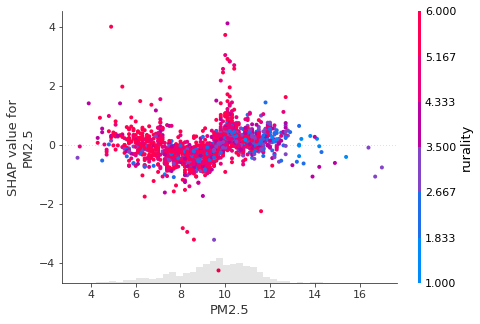

In [65]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

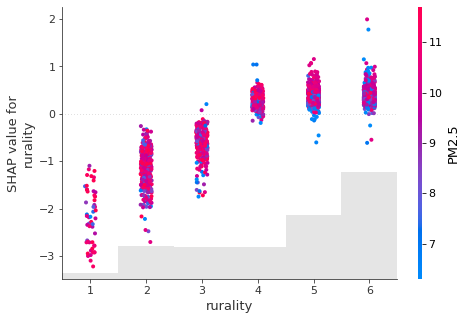

In [66]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

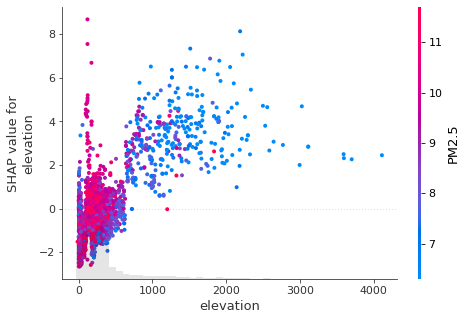

In [67]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

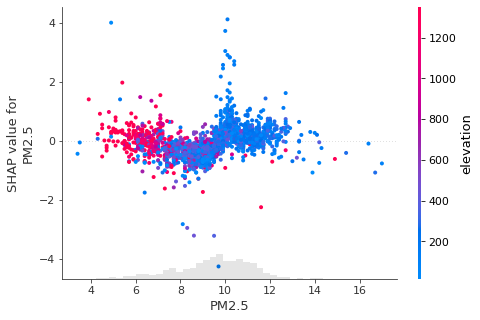

In [68]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

### social economic factors

In [69]:
social_2011.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
23,36119,48306.0,0.088929,0.131234,0.000916,0.144683,0.189093,0.042072,0.267763,0.145379,0.306614,0.241451,0.418821,0.363424,0.026259,0.219030,"Westchester County, NY",1.987658
26,36085,31276.0,0.110450,0.131981,0.002494,0.159258,0.233932,0.035518,0.113446,0.125585,0.290231,0.234017,0.352839,0.433010,0.021857,0.222412,"Richmond County, NY",1.470761
27,36089,21013.0,0.175920,0.139977,0.112157,0.080430,0.297143,0.015374,0.046975,0.136948,0.053792,0.214857,0.071032,0.560817,0.118354,0.227359,"St. Lawrence County, NY",8.953353
28,36109,26199.0,0.203616,0.077040,0.082709,0.136046,0.303702,0.013444,0.118258,0.107064,0.137743,0.163372,0.199588,0.383646,0.133590,0.197805,"Tompkins County, NY",6.202585
29,36113,28939.0,0.106980,0.098109,0.070767,0.067906,0.195584,0.009439,0.048014,0.167744,0.048412,0.207764,0.046421,0.443926,0.024739,0.177804,"Warren County, NY",7.651461


In [70]:
X = social_2011.iloc[:, 1:-2]
y = social_2011.iloc[:, -1].array

In [71]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


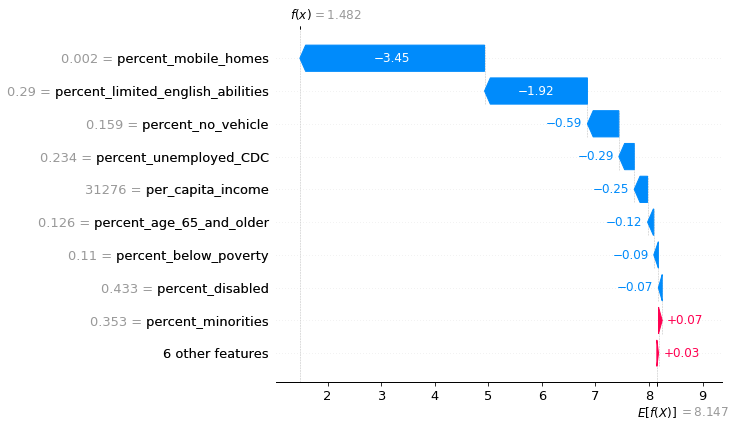

In [72]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

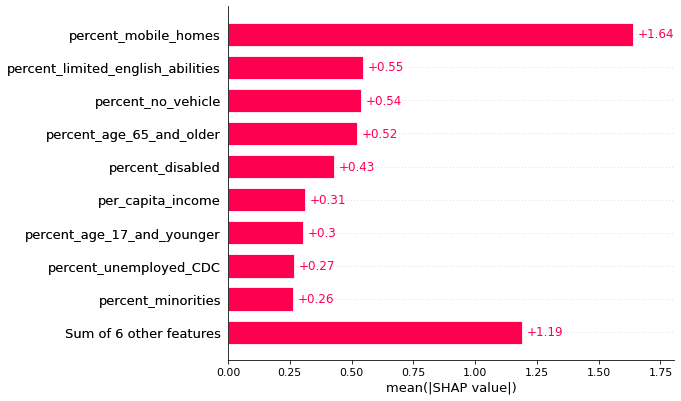

In [73]:
shap.plots.bar(shap_values)

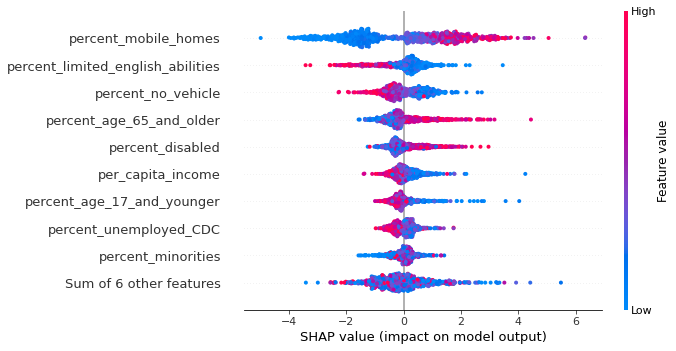

In [74]:
shap.plots.beeswarm(shap_values)

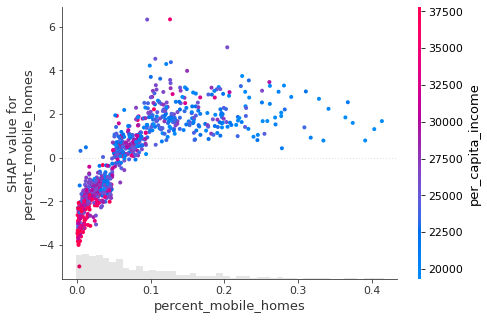

In [75]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)